In [21]:
import soundfile
from IPython.display import Audio
import matplotlib.pyplot as plt
import pyloudnorm as pyln

In [13]:
audio, sr = soundfile.read('/workspace/midi2wav/audio_output/train/random_track144193/flute_x_violin.wav')

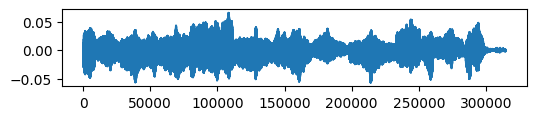

In [20]:
plt.figure(figsize=(6,1))
plt.plot(audio)

In [14]:
Audio(audio, rate=sr)

# normalization

In [24]:
# peak normalize audio to -1 dB
peak_normalized_audio = pyln.normalize.peak(audio, -1.0)

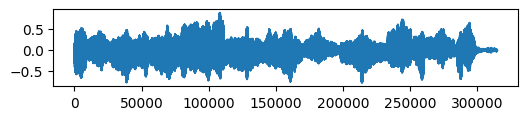

In [25]:
plt.figure(figsize=(6,1))
plt.plot(peak_normalized_audio)

In [36]:
peak_normalized_audio.max()

0.8912509381337456

In [28]:
Audio(peak_normalized_audio, rate=sr)

In [29]:
# measure the loudness first 
meter = pyln.Meter(sr) # create BS.1770 meter
loudness = meter.integrated_loudness(audio)

In [34]:
# loudness normalize audio to -13 dB LUFS
loudness_normalized_audio = pyln.normalize.loudness(audio, loudness, -13.0)

/root/mambaforge/envs/ddsp/lib/python3.8/site-packages/pyloudnorm/normalize.py:62: UserWarning: Possible clipped samples in output.
  warnings.warn("Possible clipped samples in output.")


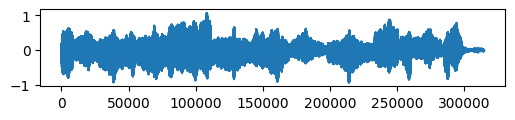

In [35]:
plt.figure(figsize=(6,1))
plt.plot(loudness_normalized_audio)

In [37]:
loudness_normalized_audio.max()

1.07269753698928

In [49]:
loudness_normalized_audio.min()

-0.93779845222584

In [39]:
soundfile.write('./audio_output/loudness_normalized_audio.wav', loudness_normalized_audio, sr)

In [40]:
soundfile.write('./audio_output/peak_normalized_audio.wav', peak_normalized_audio, sr)

In [43]:
wav1, sr = soundfile.read('./audio_output/loudness_normalized_audio.wav')

In [44]:
wav2, sr = soundfile.read('./audio_output/peak_normalized_audio.wav')

In [51]:
wav1.max()

0.999969482421875

In [50]:
wav1.max()/loudness_normalized_audio.max()* loudness_normalized_audio.min()

-0.8742164501657472

In [48]:
wav1.min()

-0.93780517578125

In [46]:
wav2.max()

0.8912353515625

In [47]:
wav2.min()

-0.7791748046875